# Desafios

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
# Dados do dicionário do ENEM
faltou = 0
presente = 1
eliminado = 2

dados_nota = dados.copy()

dados_nota.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0 # dados[dados['TP_PRESENCA_CN'] == presente]['NU_NOTA_CN'].mean()
dados_nota.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0
dados_nota.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0
dados_nota.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0

dados_nota[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

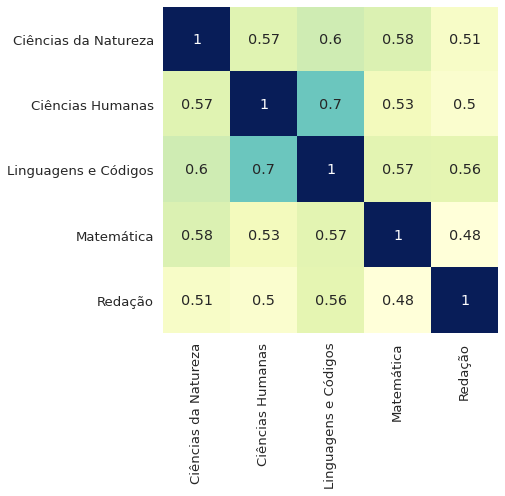

In [0]:
sns.set(font_scale=1.2)

labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    # mask=np.triu(np.ones_like(corr, dtype=np.bool))
)

plt.show()

# Reseta as configurações para o padrão
sns.set()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [0]:
dados_nota_2 = dados_nota.copy()

# dados_nota_2.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'], inplace=True)

dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2.apply(conta_acertos, materia='CN', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2.apply(conta_acertos, materia='CH', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2.apply(conta_acertos, materia='LC', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2.apply(conta_acertos, materia='MT', axis=1)

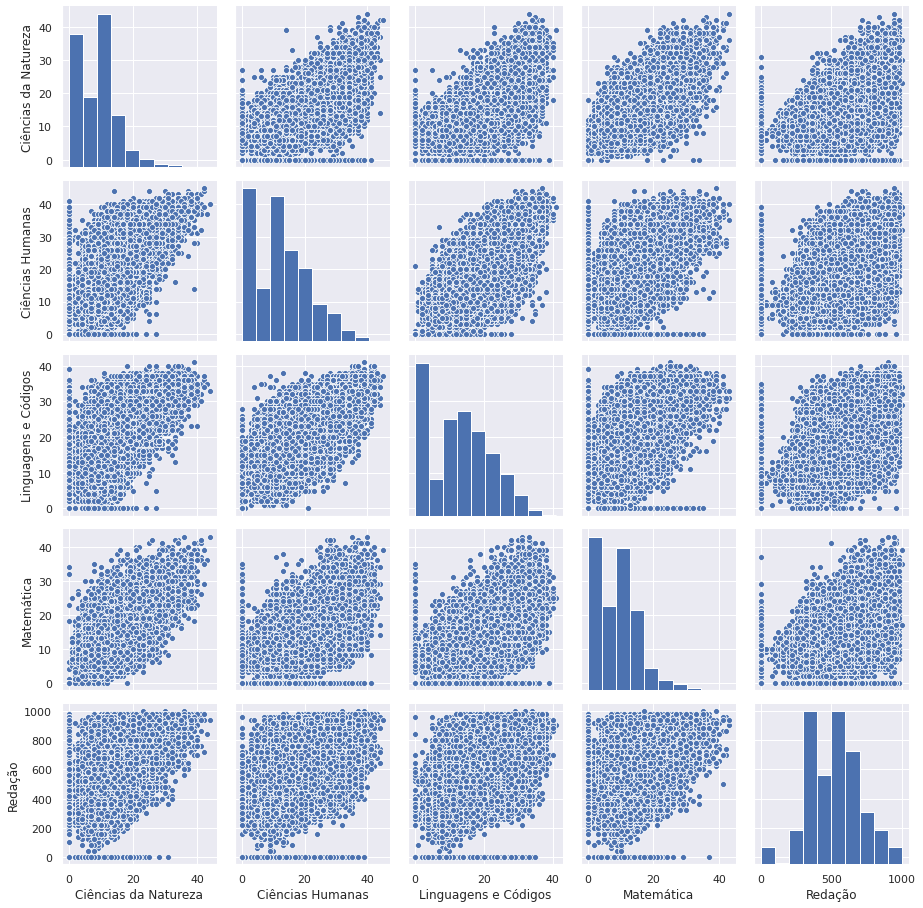

In [0]:
num_questoes_acertadas = dados_nota_2[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set()
sns.pairplot(num_questoes_acertadas)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
# Seguindo a dica da Thais
import numpy as np

dados_nota_sem_0 = dados_nota_2.copy()

# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'].replace(0, None)

dados_nota_sem_0['NU_NOTA_CN'] = dados_nota_2['NU_NOTA_CN'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_CH'] = dados_nota_2['NU_NOTA_CH'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_LC'] = dados_nota_2['NU_NOTA_LC'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_MT'] = dados_nota_2['NU_NOTA_MT'].replace(0., np.NAN)

dados_nota_sem_0.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

dados_nota_sem_0[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
6,428.50,505.20,521.00,436.80
8,491.80,575.70,524.40,487.60


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [0]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


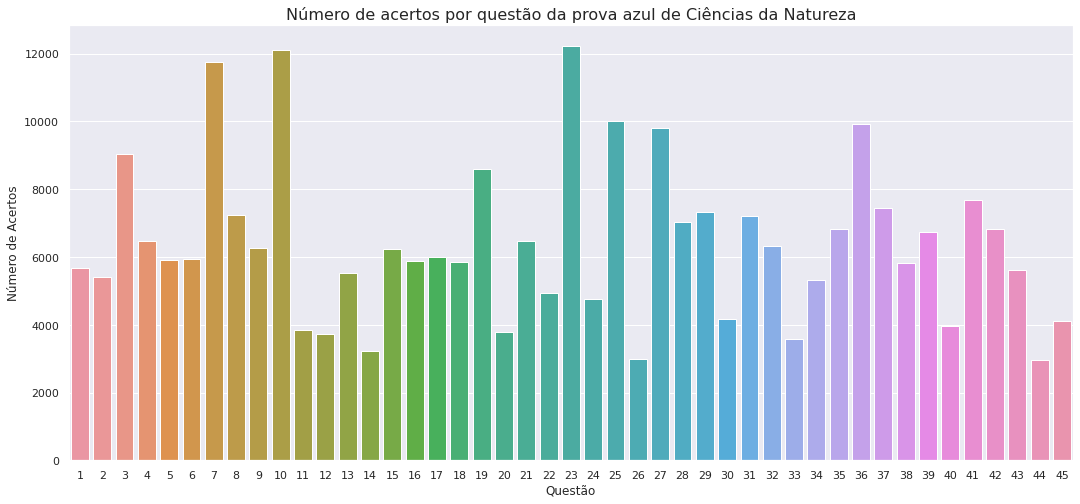

In [0]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!